# Data Analysis of Netflix 

Dataset Link: https://www.kaggle.com/datasets/luiscorter/netflix-original-films-imdb-scores )

# Missions:

* In which language were the long-running films created according to the dataset? Make a visualization.
* Find and visualize the IMDB values ​​of movies shot in the 'Documentary' genre between January 2019 and June 2020.
* Which genre has the highest IMDB rating among movies shot in English?
* What is the average 'run time' of movies shot in 'Hindi'?
* How many categories are in the 'Type' Column and what are these categories? Express it visually.
* Find the 3 most used languages ​​in movies in the dataset.
* What are the 10 movies with the highest IMDB ratings?
* What is the relationship between IMDB score and 'Uptime'? Examine and visualize.
* What are the top 10 'Genres' with the highest IMDB Ratings? Visualize it.
* What are the top 10 movies with the highest 'runtime'? Visualize it.
* In which year were the most movies released? Visualize it.
* What are the language movies* with the lowest average IMBD rating? Visualize it.
* Which year has the largest total working time?
* What is the most used "Genre" of each language?
* Are there outliers in the data set? Please explain.

In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

In [80]:

data=pd.read_csv("Netflix.csv", encoding = 'ISO-8859-1')


In [81]:
data.head()

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi


In [82]:
## Exploratory Data Analysis

def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [83]:
check_df(data)

##################### Shape #####################
(584, 6)
##################### Types #####################
Title          object
Genre          object
Premiere       object
Runtime         int64
IMDB Score    float64
Language       object
dtype: object
##################### Head #####################
             Title                  Genre           Premiere  Runtime  \
0  Enter the Anime            Documentary     August 5, 2019       58   
1      Dark Forces               Thriller    August 21, 2020       81   
2          The App  Science fiction/Drama  December 26, 2019       79   
3   The Open House        Horror thriller   January 19, 2018       94   
4      Kaali Khuhi                Mystery   October 30, 2020       90   

   IMDB Score          Language  
0         2.5  English/Japanese  
1         2.6           Spanish  
2         2.6           Italian  
3         3.2           English  
4         3.4             Hindi  
##################### Tail #####################
    

# In which language were the long-running films created according to the dataset? Make a visualization.

In [84]:
long_running = data.groupby("Language").agg({"Runtime": "mean"}).sort_values(by="Runtime", ascending=False)
long_running.reset_index(inplace=True)
print(long_running)

                      Language     Runtime
0                 English/Akan  136.000000
1         Khmer/English/French  136.000000
2                      Marathi  121.666667
3               English/Korean  121.000000
4              Spanish/Catalan  116.000000
5                       Korean  115.833333
6                        Hindi  115.787879
7               English/Arabic  114.000000
8                   Indonesian  103.777778
9                      Turkish  101.800000
10                       Malay  101.000000
11                       Tamil  101.000000
12                        Thai  101.000000
13                       Dutch   99.666667
14                      German   99.600000
15                    Filipino   99.500000
16                    Japanese   99.333333
17                      Polish   98.666667
18                     Italian   98.357143
19             Spanish/English   96.000000
20                     Spanish   93.387097
21                      French   92.700000
22         

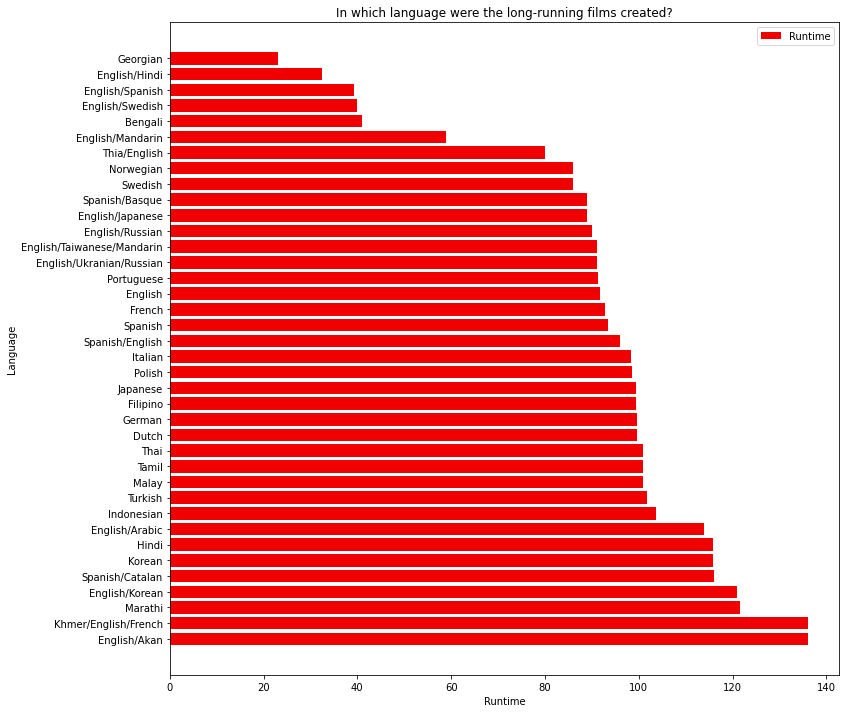

In [85]:
f=plt.figure(figsize=(12,12))

plt.barh(long_running.Language,long_running.Runtime,
        color="#f00000",label="Runtime")

plt.ylabel("Language")
plt.xlabel("Runtime")
plt.legend()
plt.title("In which language were the long-running films created?")
plt.show()

## Find and visualize the IMDB values ​​of movies shot in the 'Documentary' genre between January 2019 and June 2020.

In [86]:
import datetime as dt

In [95]:
for col in data.columns:
    if "Premiere" in col:
        data[col] = data[col].apply(pd.to_datetime)

In [96]:
documentary_19_20 = data.loc[(data["Premiere"] > "2019-01-31") & (data["Premiere"] < "2020-06-01") & (data["Genre"] == "Documentary")&(data["ımdb_Score"])].sort_values(by="Premiere", ascending=False)

In [97]:
print(documentary_19_20)

                                                 Title        Genre  \
401       Have a Good Trip: Adventures in Psychedelics  Documentary   
396                                           Becoming  Documentary   
563                                      A Secret Love  Documentary   
303           Murder to Mercy: The Cyntoia Brown Story  Documentary   
455                                    Circus of Books  Documentary   
484                                       LA Originals  Documentary   
555                 Crip Camp: A Disability Revolution  Documentary   
392      A Life of Speed: The Juan Manuel Fangio Story  Documentary   
523                                     Miss Americana  Documentary   
458                            El Pepe: A Supreme Life  Documentary   
15                                      After the Raid  Documentary   
436                         Lorena, Light-Footed Woman  Documentary   
367                       Bikram: Yogi, Guru, Predator  Documentary   
521   

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, "IMDB values of movies shot in the 'Documentary' genre between January 2019 and June 2020")

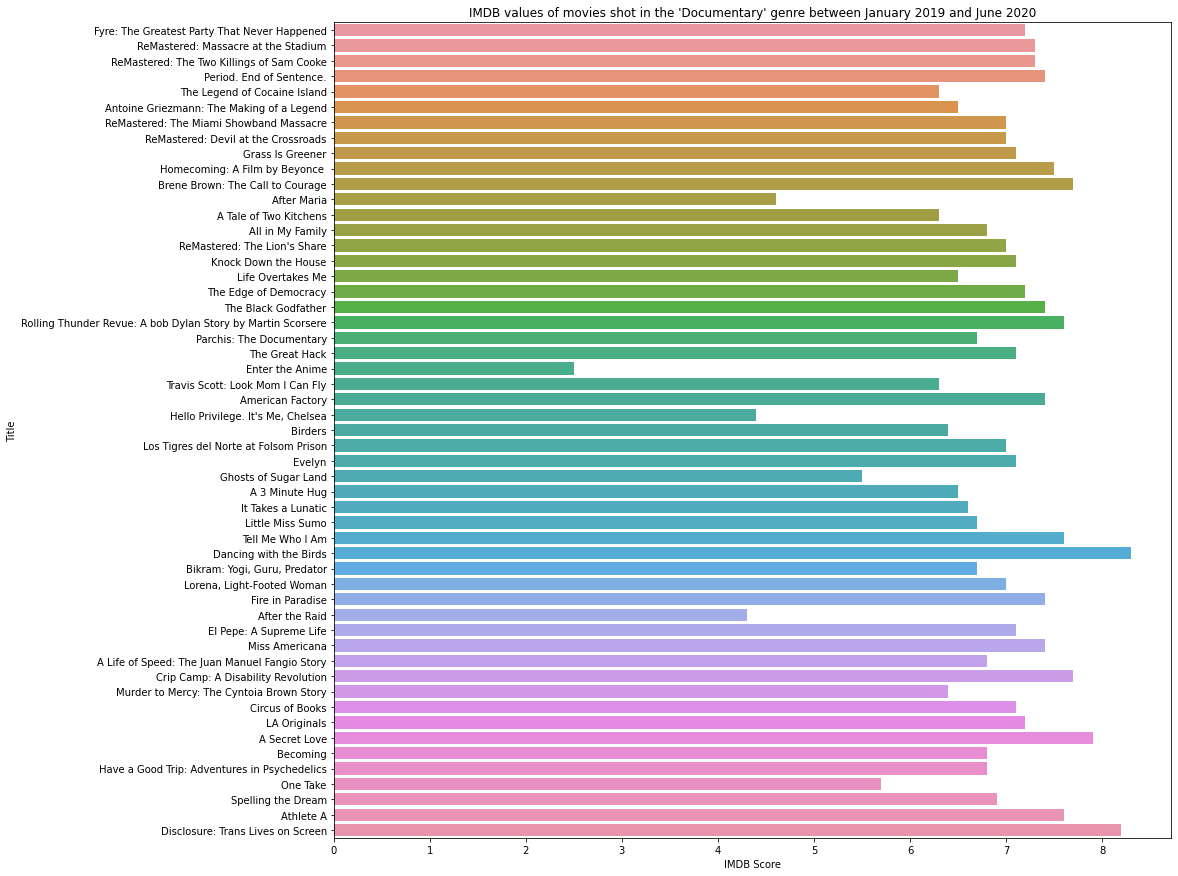

In [133]:
data["Date"] = pd.to_datetime(data.Premiere)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
film_ = data[data["Genre"] == "Documentary"].sort_values(["Year", "Month"]) 
film_1 = film_[film_["Year"] == 2019]
film_2020 = film_[film_["Year"] == 2020]
film_2 = film_2020[film_2020["Month"] <= 6]

films_imdb = pd.concat([film_1, film_2], axis=0)
plt.figure(figsize=(15,15))
sns.barplot(films_imdb["IMDB Score"], films_imdb["Title"])
plt.title("IMDB values of movies shot in the 'Documentary' genre between January 2019 and June 2020")

# Which genre has the highest IMDB rating among movies shot in English?

In [120]:
data.loc[(data["Language"] == "English")]
dfeng = data.loc[(data["Language"] == "English")]
dfeng.sort_values(by="IMDB Score", ascending=False)[0:1]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date,Yıl,Ay,Year,Month
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,2020-10-04,2020,10,2020,10


# What is the average 'run time' of movies shot in 'Hindi'?

In [117]:
data.loc[(data["Language"] == "Hindi")].agg({"Runtime": "mean"})

Runtime    115.787879
dtype: float64

# How many categories are in the 'Type' Column and what are these categories? Express it visually.

In [121]:
# How many categories:
data["Genre"].nunique() 

115

In [123]:
#These categories:
print(data["Genre"].value_counts())

Documentary                             159
Drama                                    77
Comedy                                   49
Romantic comedy                          39
Thriller                                 33
                                       ... 
Romantic comedy-drama                     1
Heist film/Thriller                       1
Musical/Western/Fantasy                   1
Horror anthology                          1
Animation/Christmas/Comedy/Adventure      1
Name: Genre, Length: 115, dtype: int64


E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Genres')

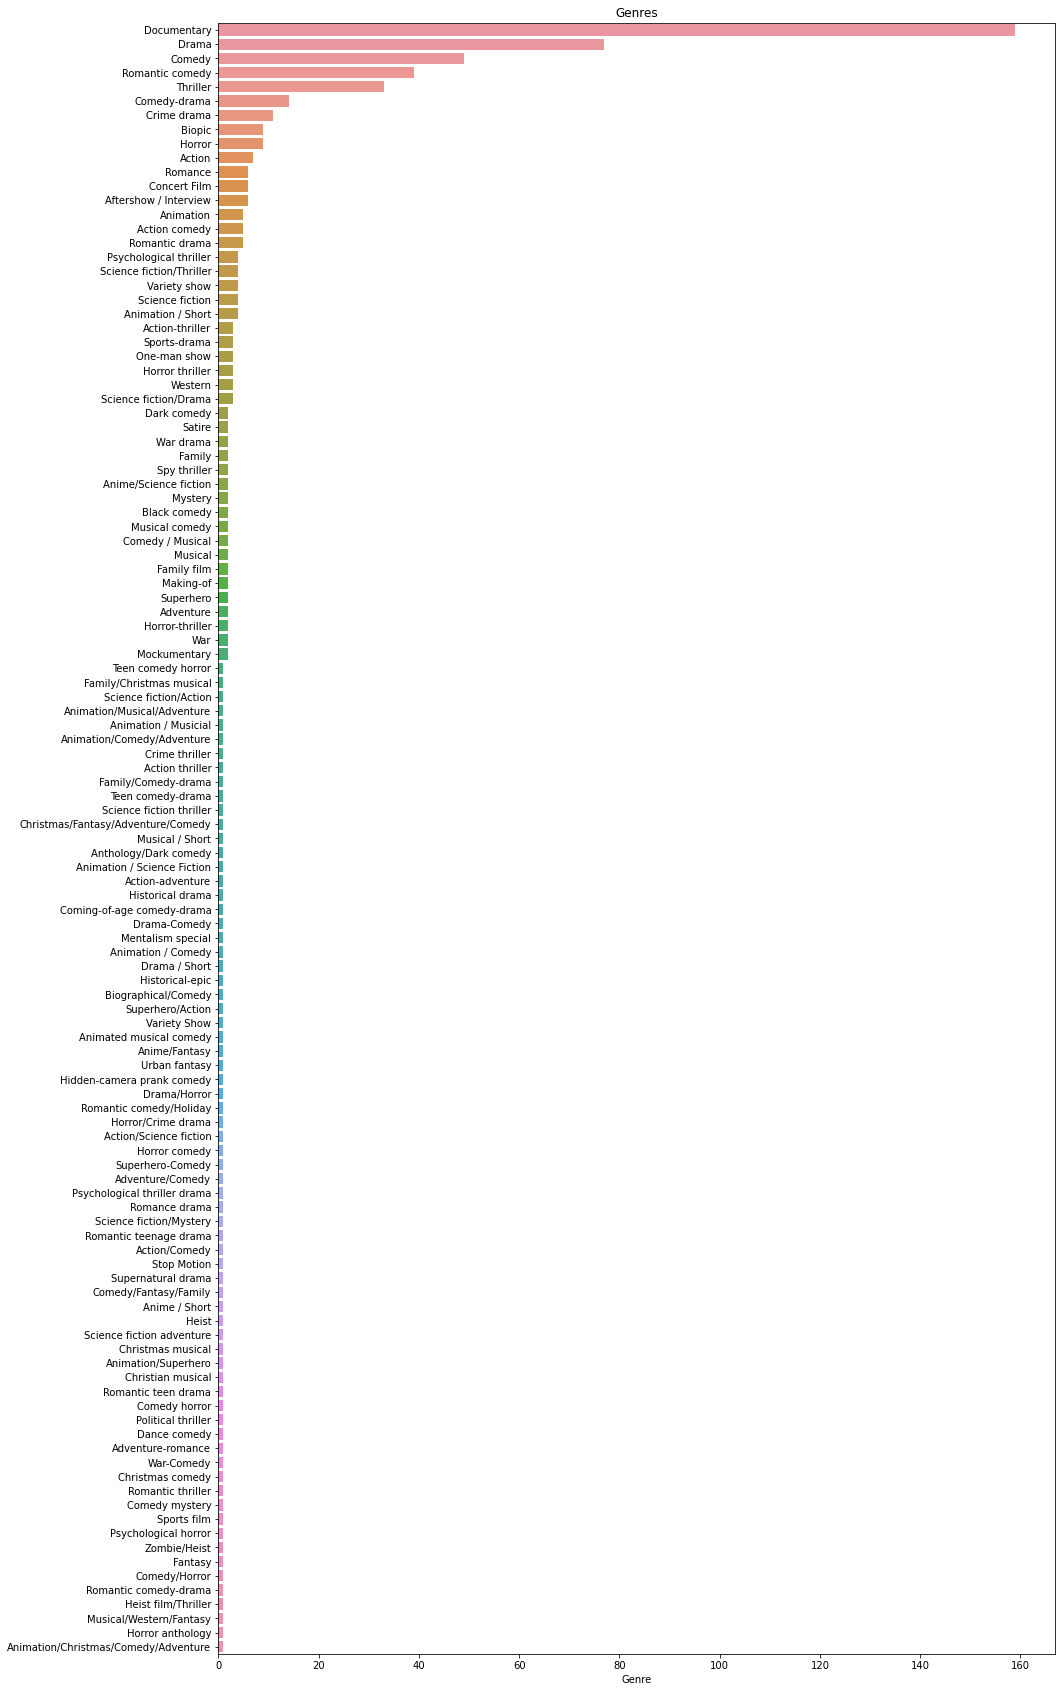

In [126]:
Genres = data["Genre"].value_counts() 
plt.figure(figsize=(15,30))
sns.barplot(Genres, Genres.index)
plt.title('Genres')

# Find the 3 most used languages ​​in movies in the dataset.

In [127]:
data["Language"].value_counts(sort=True)[0:3]

English    401
Hindi       33
Spanish     31
Name: Language, dtype: int64

# What are the 10 movies with the highest IMDB ratings?

In [131]:
data.sort_values(by="IMDB Score", ascending=False).head(10)

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Date,Yıl,Ay,Year,Month
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,2020-10-04,2020,10,2020,10
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020-12-08,2020,12,2020,12
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018-12-16,2018,12,2018,12
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015-10-09,2015,10,2015,10
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018-12-31,2018,12,2018,12
578,Ben Platt: Live from Radio City Music Hall,Concert Film,2020-05-20,85,8.4,English,2020-05-20,2020,5,2020,5
577,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English,2019-10-23,2019,10,2019,10
576,Cuba and the Cameraman,Documentary,2017-11-24,114,8.3,English,2017-11-24,2017,11,2017,11
573,Klaus,Animation/Christmas/Comedy/Adventure,2019-11-15,97,8.2,English,2019-11-15,2019,11,2019,11
571,13th,Documentary,2016-10-07,100,8.2,English,2016-10-07,2016,10,2016,10


# What is the relationship between IMDB score and 'Uptime'? Examine and visualize.

In [142]:
data_korelasyon = data[["IMDB Score", "Runtime"]]
data_korelasyon.corr()

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


<AxesSubplot:>

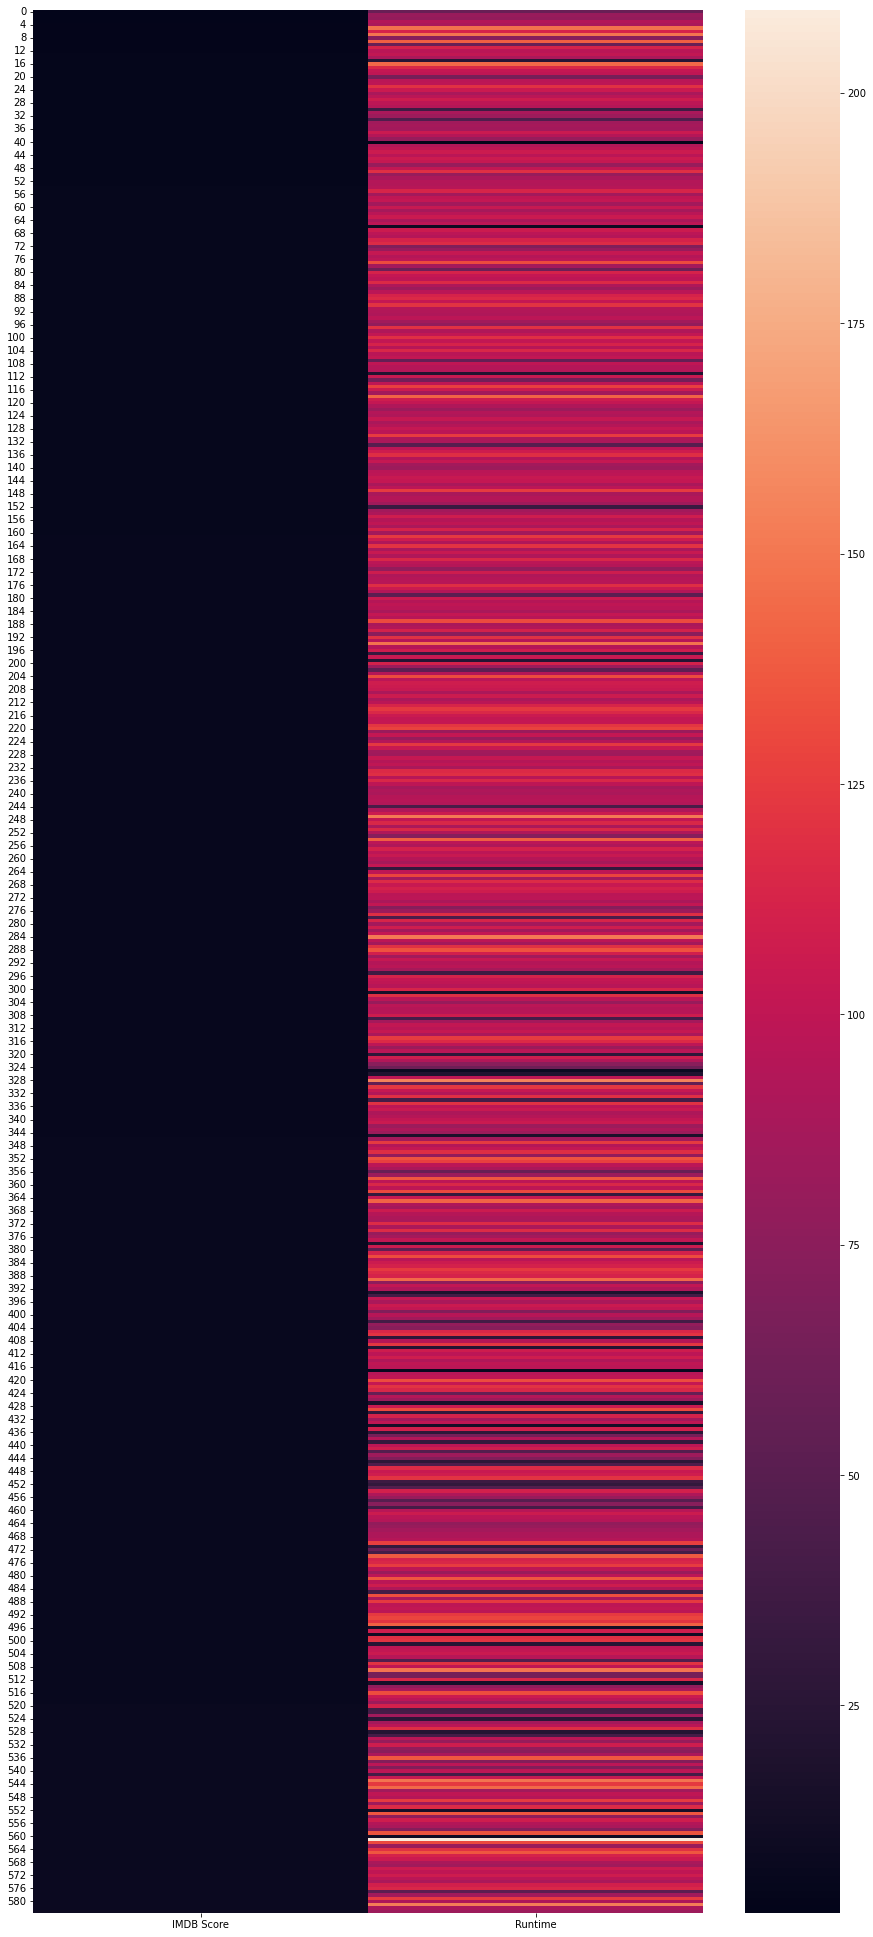

In [162]:
plt.figure(figsize=(15, 35))
sns.heatmap(data_korelasyon)

            IMDB Score   Runtime
IMDB Score    1.000000 -0.040896
Runtime      -0.040896  1.000000


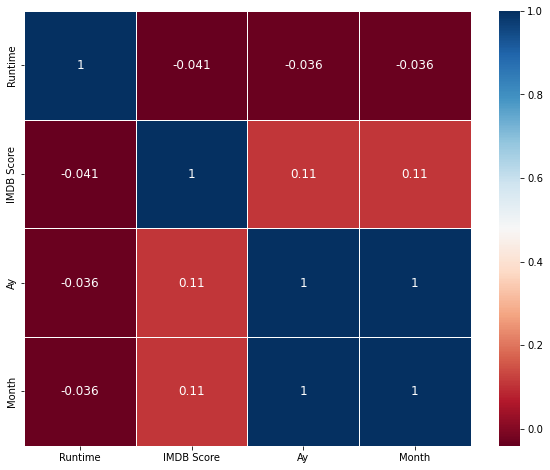

In [184]:
def correlation_matrix(dataframe, cols):
    fig = plt.gcf()
    fig.set_size_inches(10, 8)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    fig = sns.heatmap(dataframe[cols].corr(), annot=True, linewidths=0.5, annot_kws={'size': 12}, linecolor='w',
                      cmap='RdBu')
    plt.show(block=True)

print(data[["IMDB Score", "Runtime"]].corr())
correlation_matrix(data, num_cols)

# What are the top 10 'Genres' with the highest IMDB Ratings? Visualize it.

In [188]:
films = data.groupby("Genre")["IMDB Score"] # We grouped movies by genre
max_high = films.max().reset_index(name = 'IMDB Rating') # We index the ones with the highest IMDB scores in a new column
result = max_high.sort_values('IMDB Rating', ascending=False).head(10)

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Top 10 Movie Genres with IMDB Ratings')

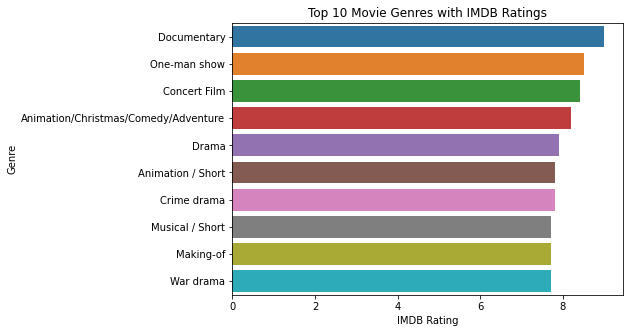

In [189]:
plt.figure(figsize=(7,5))
sns.barplot(result["IMDB Rating"], result["Genre"])
plt.title("Top 10 Movie Genres with IMDB Ratings")

# What are the top 10 movies with the highest 'runtime'? Visualize it.

E:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'The 10 Longest Movies')

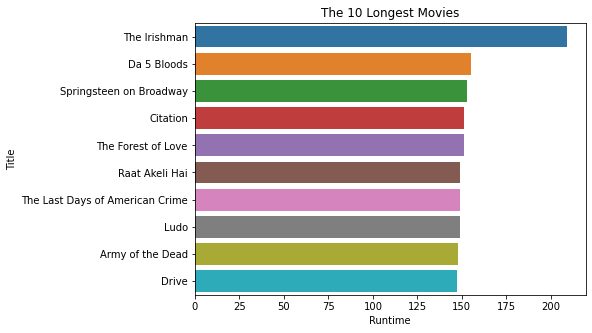

In [203]:
long_movies = data.sort_values('Runtime', ascending=False).head(10)
plt.figure(figsize=(7,5))
sns.barplot(long_movies["Runtime"], long_movies["Title"])
plt.title("The 10 Longest Movies")

# In which year were the most movies released? Visualize it.

Text(0.5, 1.0, 'Number of Movies by Year')

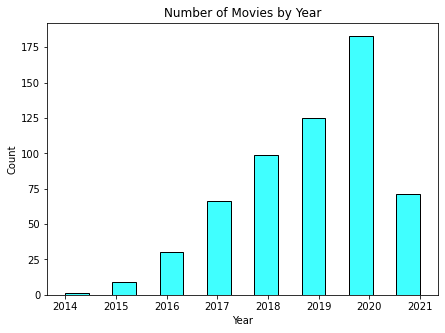

In [198]:
top_film = data["Year"].value_counts()
plt.figure(figsize=(7, 5))
sns.histplot(x='Year', data=data, bins=15, color='cyan')
plt.title("Number of Movies by Year")

In [ ]:
In which year were the most movies released? Visualize it.
What are the language movies* with the lowest average IMBD rating? Visualize it.
Which year has the largest total working time?
What is the most used "Genre" of each language?
Are there outliers in the data set? Please explain.

# What are the language movies* with the lowest average IMBD rating? Visualize it.

Text(0.5, 1.0, 'Movies with the Lowest IMDB Average by Language')

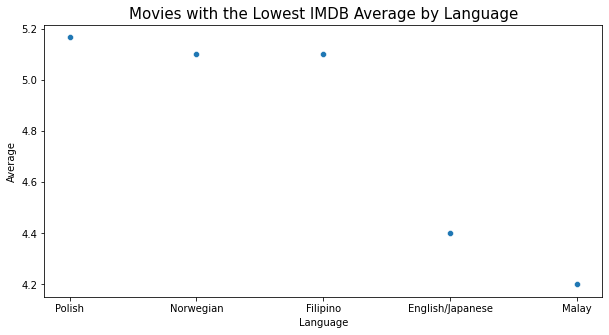

In [214]:
df_= data.groupby('Language')['IMDB Score'].mean().reset_index(name='Average').sort_values('Average', ascending=False).tail()
plt.figure(figsize=(10,5))
sns.scatterplot(x='Language', y= 'Average', data =df_ )
plt.title("Movies with the Lowest IMDB Average by Language", fontsize=15)

# Which year has the largest total working time?

In [216]:
data.groupby("Year").agg({"Runtime": "sum"}).sort_values(by="Runtime", ascending=False).head(5)

,Runtime
Year,
2020,17384
2019,10856
2018,9405
2021,7214
2017,6129


# What is the most used "Genre" of each language?

In [218]:
data.groupby("Language")["Genre"].max()

Language
Bengali                                        Documentary
Dutch                                      Romantic comedy
English                                       Zombie/Heist
English/Akan                                     War drama
English/Arabic                                 Documentary
English/Hindi                                  Documentary
English/Japanese                               Documentary
English/Korean                            Action-adventure
English/Mandarin                               Documentary
English/Russian                                Documentary
English/Spanish                                Documentary
English/Swedish                                Documentary
English/Taiwanese/Mandarin                           Drama
English/Ukranian/Russian                       Documentary
Filipino                                          Thriller
French                                            Thriller
Georgian                                       

# Are there outliers in the data set? Please explain.

<AxesSubplot:xlabel='IMDB Score'>

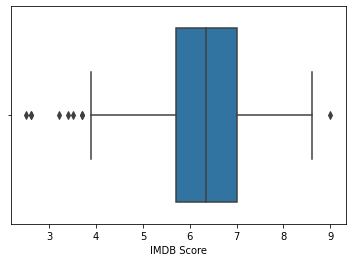

In [220]:
sns.boxplot(x = data["IMDB Score"])

<AxesSubplot:xlabel='Runtime'>

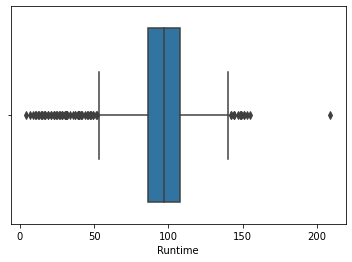

In [221]:
sns.boxplot(x = data["Runtime"])